In [28]:
# Aktifkan GPU atau TPU dari Runtime > Change runtime type > Hardware accelerator
!nvidia-smi  # Cek GPU


/bin/bash: line 1: nvidia-smi: command not found


TENSORFLOW

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
num_words = 40000  # Antara 30.000 - 50.000
maxlen = 400       # Antara 300 - 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Training shape: {x_train.shape}, Test shape: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (25000, 400), Test shape: (25000, 400)


In [30]:
#RNN / LSTM / GRU Model
def build_model(cell_type='LSTM'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
    for _ in range(2):
        if cell_type == 'RNN':
            model.add(tf.keras.layers.SimpleRNN(64, return_sequences=True))
        elif cell_type == 'LSTM':
            model.add(tf.keras.layers.LSTM(64, return_sequences=True))
        elif cell_type == 'GRU':
            model.add(tf.keras.layers.GRU(64, return_sequences=True))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 95s 574ms/step - accuracy: 0.5942 - loss: 0.6467 - val_accuracy: 0.8030 - val_loss: 0.4333
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 93s 594ms/step - accuracy: 0.8812 - loss: 0.2972 - val_accuracy: 0.8748 - val_loss: 0.3026
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 575ms/step - accuracy: 0.9628 - loss: 0.1149 - val_accuracy: 0.8478 - val_loss: 0.4002
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 145s 596ms/step - accuracy: 0.9881 - loss: 0.0419 - val_accuracy: 0.8718 - val_loss: 0.4277
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 605ms/step - accuracy: 0.9977 - loss: 0.0113 - val_accuracy: 0.8698 - val_loss: 0.4576
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step
==== RNN ====
              precision    recall  f1-score   support

         neg       0.85      0.86      0.85     12500
         pos       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg      

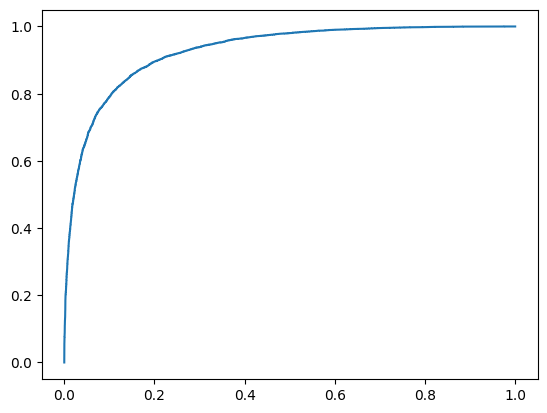

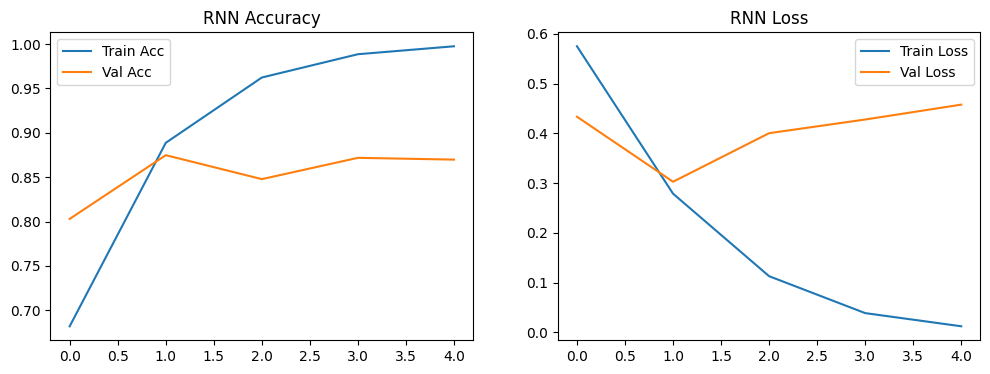

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.6734 - loss: 0.5668 - val_accuracy: 0.8714 - val_loss: 0.3100
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9257 - loss: 0.2056 - val_accuracy: 0.8738 - val_loss: 0.3214
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.9697 - loss: 0.0927 - val_accuracy: 0.8754 - val_loss: 0.3273
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9868 - loss: 0.0457 - val_accuracy: 0.8692 - val_loss: 0.4446
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.8646 - val_loss: 0.5074
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step
==== LSTM ====
              precision    recall  f1-score   support

         neg       0.87      0.81      0.84     12500
         pos       0.83      0.88      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85     

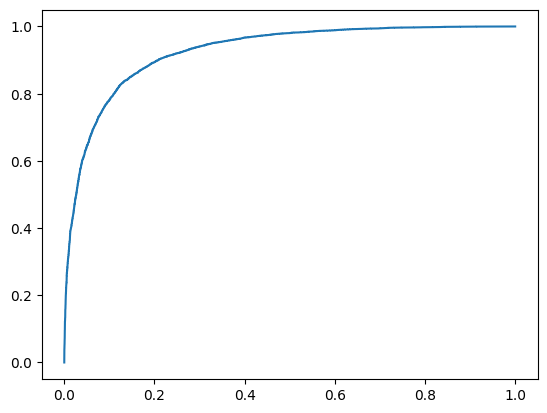

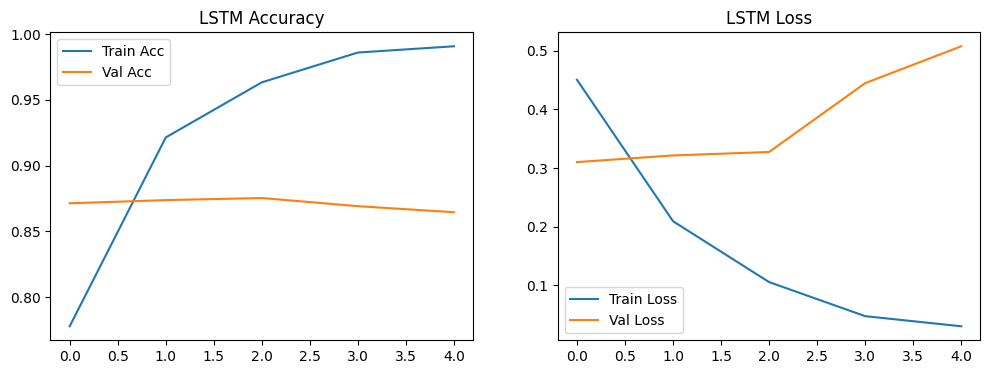

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.6291 - loss: 0.6202 - val_accuracy: 0.8396 - val_loss: 0.3621
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9050 - loss: 0.2407 - val_accuracy: 0.8720 - val_loss: 0.2964
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9665 - loss: 0.1065 - val_accuracy: 0.8794 - val_loss: 0.3489
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.9880 - loss: 0.0430 - val_accuracy: 0.8712 - val_loss: 0.4445
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9955 - loss: 0.0186 - val_accuracy: 0.8674 - val_loss: 0.5164
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 133ms/step
==== GRU ====
              precision    recall  f1-score   support

         neg       0.83      0.89      0.86     12500
         pos       0.88      0.82      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      

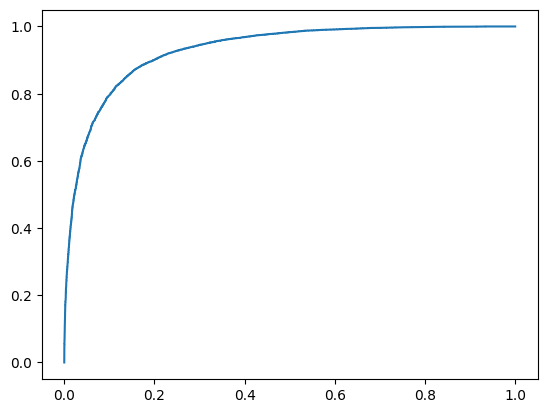

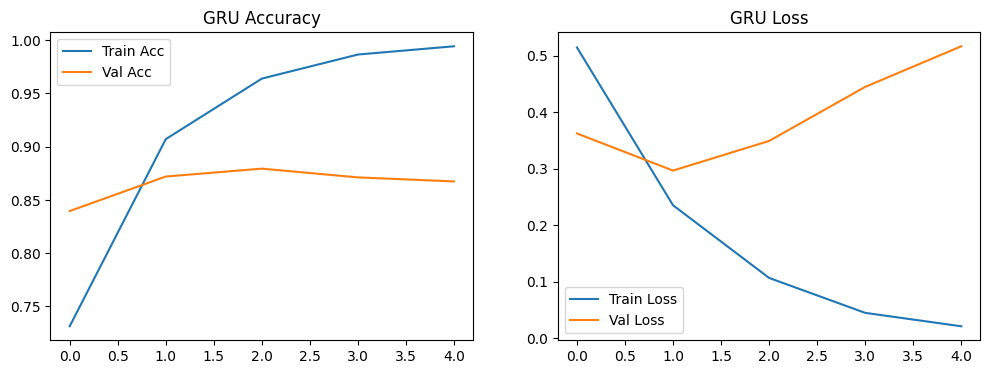

In [32]:
for cell in ['RNN', 'LSTM', 'GRU']:
    model = build_model(cell_type=cell)
    train_evaluate(model, name=cell)


In [ ]:
# Tambahkan ini di awal notebook Colab / Jupyter
%matplotlib inline
import matplotlib.pyplot as plt # Import matplotlib

for cell in ['RNN', 'LSTM', 'GRU']:
    model = build_model(cell_type=cell)
    print(f"Menjalankan training untuk {cell}...")
    history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), verbose=0) # Example fit call
    name = cell

    print(history.history.keys())  # debug

    # Plot jika key ada
    if 'accuracy' in history.history:
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Acc')
        plt.plot(history.history['val_accuracy'], label='Val Acc')
        plt.title(f"{name} Accuracy")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f"{name} Loss")
        plt.legend()

        plt.show()
    else:
        print("⚠️ History kosong atau key tidak ditemukan.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Menjalankan training untuk RNN...
